In [1]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt

##### Question 1 
> <font size="3">A trivial example here would have been to take an ideal low pass i.e. sinc in time domain.But from the inspiration of this i have used a convolution of rectangular function.<br><br>
Here we have taken  h[n] as a triangualar symmetric FIR from that the fact that if we convolute two rectangular functions we get a triangular form and in frequency domain this will turn as square of sinc function to ensure that it has zero phase.<br><br>
h[n]=$\delta[n+4]+2\delta[n+3]+3\delta[n+2]+4\delta[n+1]+5\delta[n]+4\delta[n-1]+3\delta[n-2]+2\delta[n-3]+\delta[n-4]$<br><br>
H($e^{jw}$)=$(\frac{sin(wn)}{\pi n})^2   $ <font> 

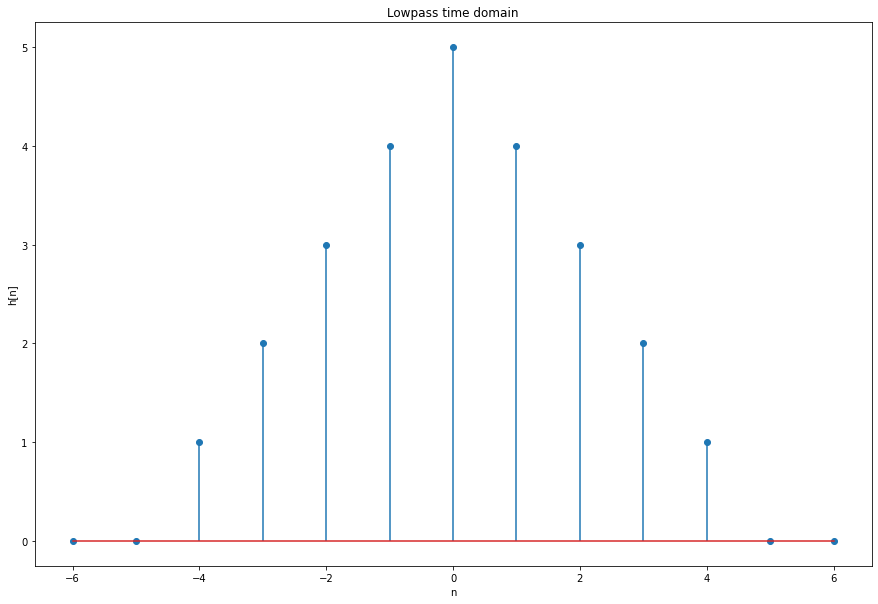

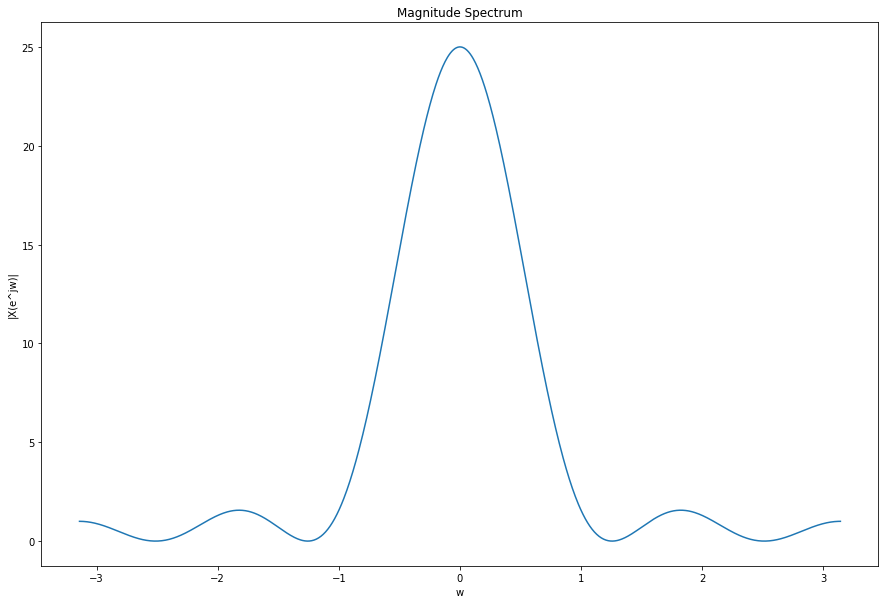

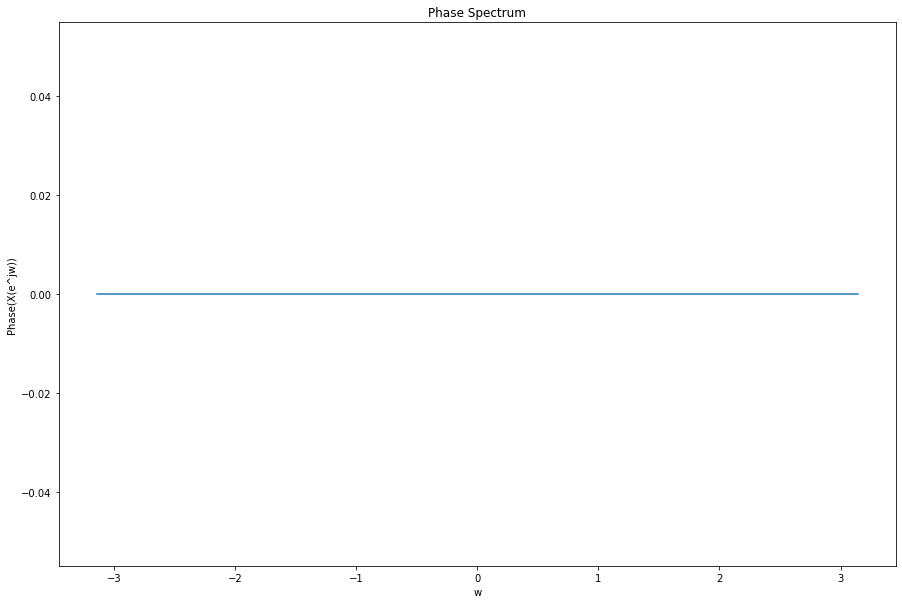

In [2]:
#1
def DTFT(dat,w,n):
    # data is the numpy array of signal, w is frequency,n is the sequence scale.
    N=len(w)
    DTFT = np.zeros(N)+np.ones(N)*1j #Initializing DTFT
    for i in range(N):               #computing DTFT
        dtft = 0
        for k in range(len(dat)):
            dtft += dat[k]*(np.cos(w[i]*n[k])+(np.sin(w[i]*n[k])*1j)) 
        DTFT[i]=dtft
    #MagnitudeSpectrum and Phase spectrum
    dtft_mag = []                          #Magnitude Array
    dtft_phi = []                          #Phase Array
    for i in range(N):                     #Calculating phase and magnitude
        dtft_mag+=[abs(DTFT[i])]           #Magnitude = root(real^2 + img^2)
        dtft_phi+=[round(np.angle(DTFT[i],deg=True),5)]#Phase=arctan(img/real)
    #Magnitude Plot
    f2=plt.figure(2,figsize=(15, 10))
    plt.plot(w,dtft_mag)
    plt.xlabel('w')
    plt.ylabel('|X(e^jw)|')
    plt.title('Magnitude Spectrum')
    #Phase Plot
    f3=plt.figure(3,figsize=(15, 10))
    plt.plot(w,dtft_phi)
    plt.xlabel('w')
    plt.ylabel('Phase(X(e^jw))')
    plt.title('Phase Spectrum')
    plt.show()
    return(DTFT)
n=np.linspace(-6,6,num=13)
h=[ 0,0,1, 2, 3, 4, 5, 4, 3, 2, 1,0,0] # we are using symmetric FIR
w_0=np.linspace(-np.pi,np.pi,num=1000)
f1=plt.figure(1,figsize=(15, 10))
plt.stem(n,h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Lowpass time domain')
H=DTFT(h,w_0,n)

> As we can see the magnitude of dtft dies down as frequency increases and therefore we can say it is a low pass filter although not an ideal low pass filter.

#### 2-a
<font size="3">Here we are using filter h[n]=$\delta[n-4]-\delta[n]$ so that we can extract an antisymmetric signal of odd length from Type 1 system.<br><br>
Type 1 system = $\delta[n] + 2\delta[n-1] + 3\delta[n-2] + 2\delta[n-3] +\delta[n-4]$          <font>

Text(0.5, 1.0, 'Type 3 system')

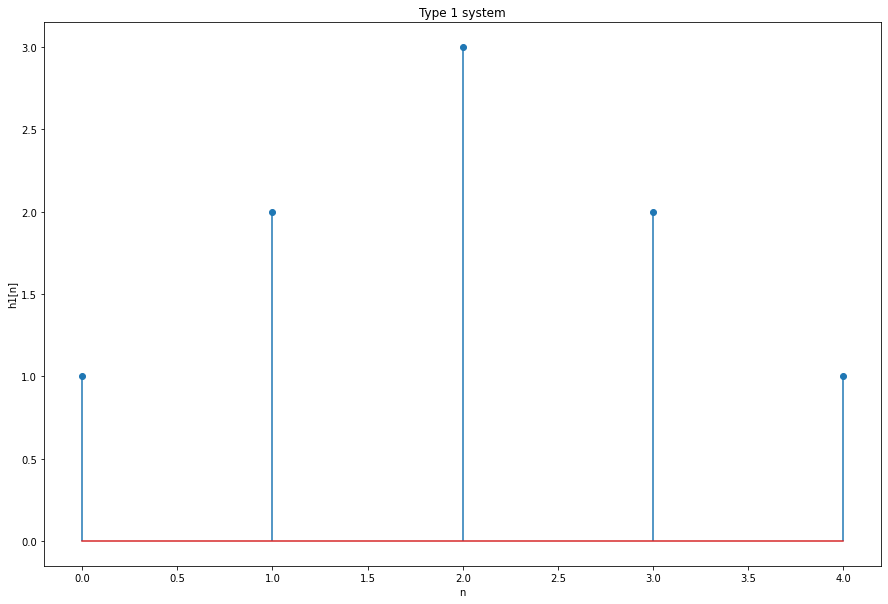

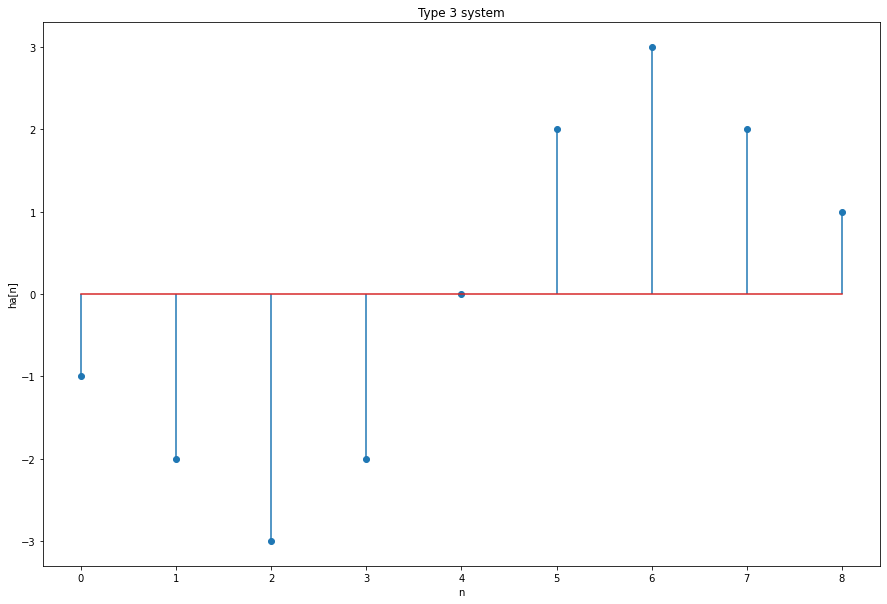

In [3]:
#2-a
def conv(x, h, n):
    x = np.hstack((np.zeros(np.sum(n < 0)), np.array(x)))          #adding zeros at beginning 
    h = np.flip(h)

    n  =  x.shape[0]
    m = h.shape[0]
    pads = np.zeros(m-1)
    x =  np.hstack((pads, x, pads))
    y = np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])    #summing all possible indexes
    return y
h1=[1,2,3,2,1]#Type 1 system
n1=[0,1,2,3,4]
f=[-1,0,0,0,1]
ha=conv(h1,f,np.linspace(0,len(f)-1,num=len(f)))
f1=plt.figure(1,figsize=(15, 10))
plt.stem(n1,h1,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h1[n]')
plt.title('Type 1 system')
f2=plt.figure(2,figsize=(15, 10))
plt.stem(ha,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('ha[n]')
plt.title('Type 3 system')

#### 2-b
<font size="3">Here we are using filter h[n]=$\delta[n-6]-\delta[n]$ so that we can extract an antisymmetric signal of even length from Type 2 system.<br><br>
Type 2 system = $\delta[n] + 2\delta[n-1] + 3\delta[n-2] + 3\delta[n-3] + 2\delta[n-4] + \delta[n-5]$          <font>

Text(0.5, 1.0, 'Type 4 system')

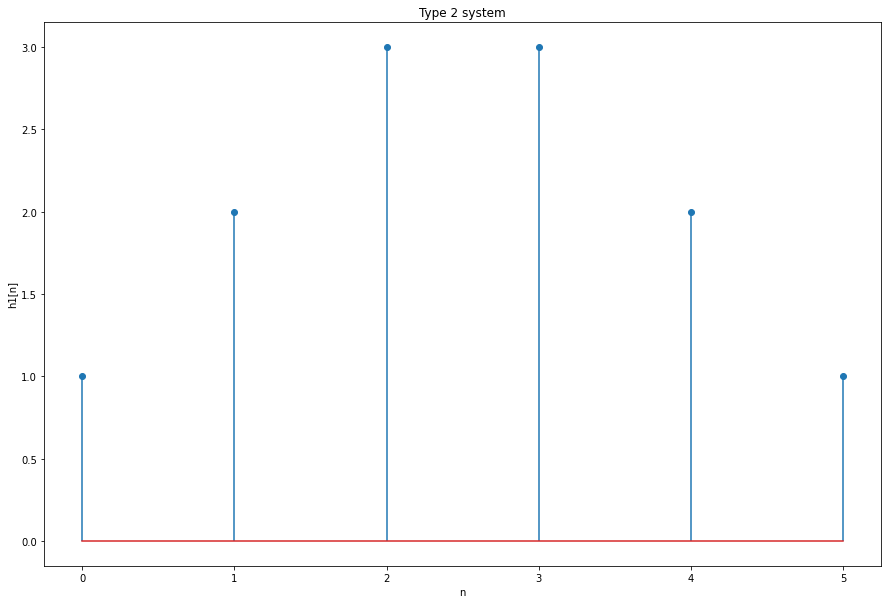

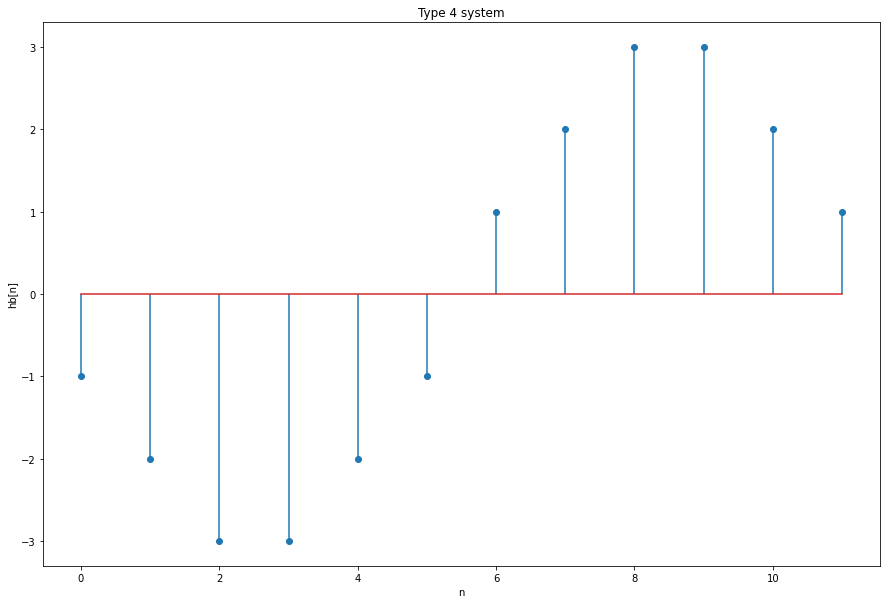

In [4]:
#2-b
h2=[1,2,3,3,2,1]#Type 2 system
n2=[0,1,2,3,4,5]
f1=[-1,0,0,0,0,0,1]
hb=conv(h2,f1,np.linspace(0,len(f1)-1,num=len(f1)))
f1=plt.figure(1,figsize=(15, 10))
plt.stem(n2,h2,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h1[n]')
plt.title('Type 2 system')
f2=plt.figure(2,figsize=(15, 10))
plt.stem(hb,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('hb[n]')
plt.title('Type 4 system')

In [5]:
def DTFTnew(dat,w):
    # data is the numpy array of signal, w is frequency,n is the sequence scale.
    N=len(w)
    DTFT = np.zeros(N)+np.ones(N)*1j #Initializing DTFT
    for i in range(N):               #computing DTFT
        dtft = 0
        for k in range(len(dat)):
            dtft += dat[k]*(np.cos(w[i]*k)+(np.sin(w[i]*k)*1j)) 
        DTFT[i]=dtft
    #MagnitudeSpectrum and Phase spectrum
    dtft_mag = []                          #Magnitude Array
    dtft_phi = []  #Phase Array
    dtft_G = np.zeros(N)   
    for i in range(N):                     #Calculating phase and magnitude
        dtft_mag+=[abs(DTFT[i])]           #Magnitude = root(real^2 + img^2)
        dtft_phi+=[np.angle(DTFT[i],deg=True)]#Phase=arctan(img/real)
    for i in range(N): 
        if i > 1:
            dtft_G[i]=-round((dtft_phi[i]-dtft_phi[i-1])/(w[i]-w[i-1])*(np.pi/180),3)
        elif i==1:
            dtft_G[i]=-round((dtft_phi[i]-dtft_phi[i-1])/(w[i]-w[i-1])*(np.pi/180),3)
            dtft_G[i-1]=dtft_G[i]
        #Magnitude Plot
    for i in range(N):
        if abs(dtft_G[i])>10:             # removing infinity cases
            dtft_G[i]=dtft_G[20]
    f2=plt.figure(2,figsize=(15, 10))
    plt.plot(w,dtft_mag)
    plt.xlabel('w')
    plt.ylabel('|X(e^jw)|')
    plt.title('Magnitude Spectrum')
    #Phase Plot
    f3=plt.figure(3,figsize=(15, 10))
    plt.plot(w,dtft_phi)
    plt.xlabel('w')
    plt.ylabel('Phase(X(e^jw))')
    plt.title('Phase Spectrum')
    f4=plt.figure(4,figsize=(15, 10))
    plt.plot(w,dtft_G)
    plt.xlabel('w')
    plt.ylabel('grp[H(e^jw)]')
    plt.title('groupdelay')
    plt.show()
    return(DTFT,dtft_mag,dtft_phi)
w_1=np.linspace(-np.pi,np.pi,num=1000)

In the code we have removed the cases where group delay tends to infinity

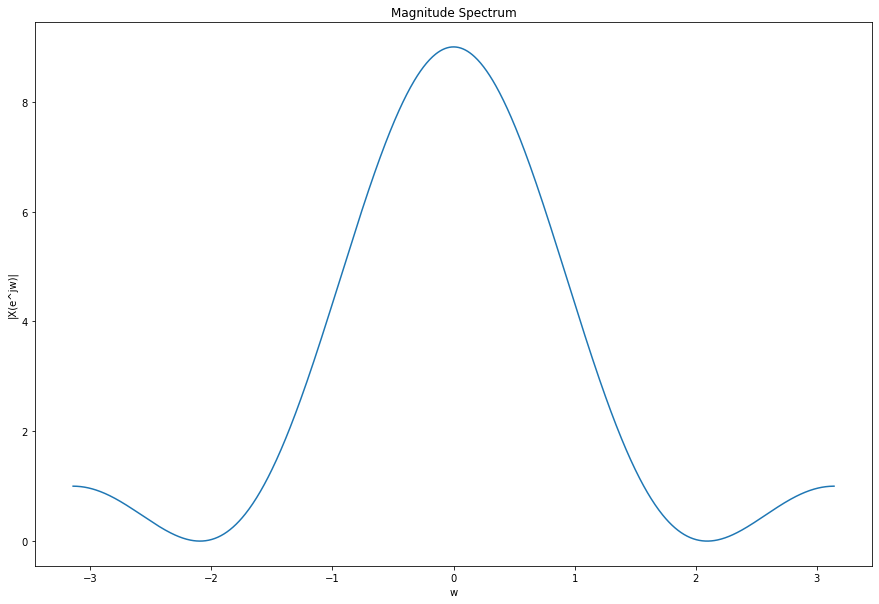

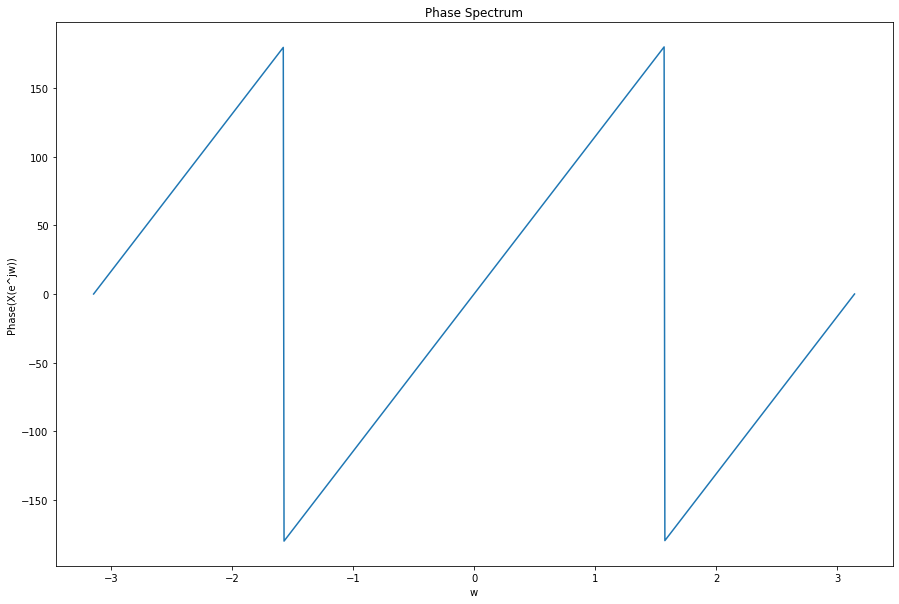

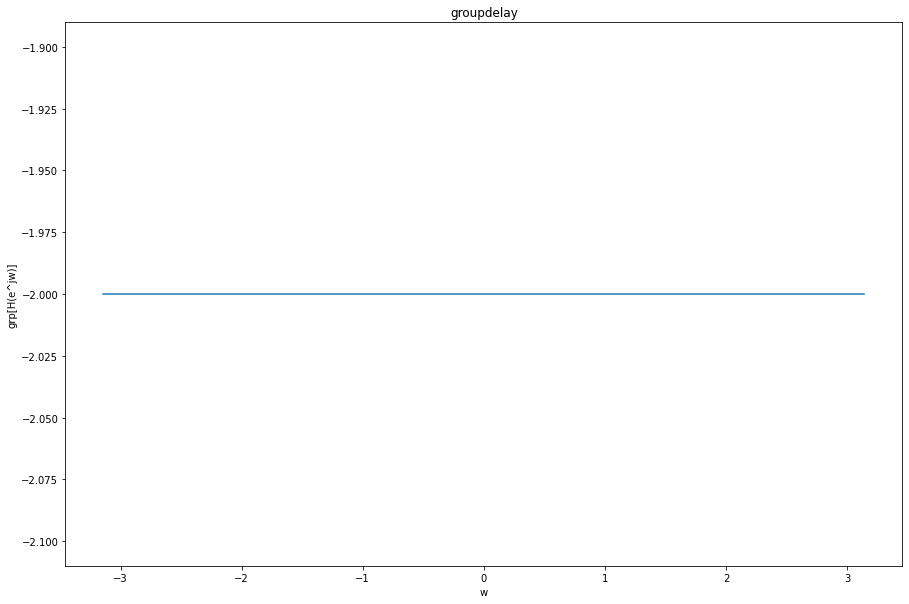

In [6]:
#2-c
A1,A2,A3=DTFTnew(h1,w_1)

We can observe that our group delay is constant and equal to M/2

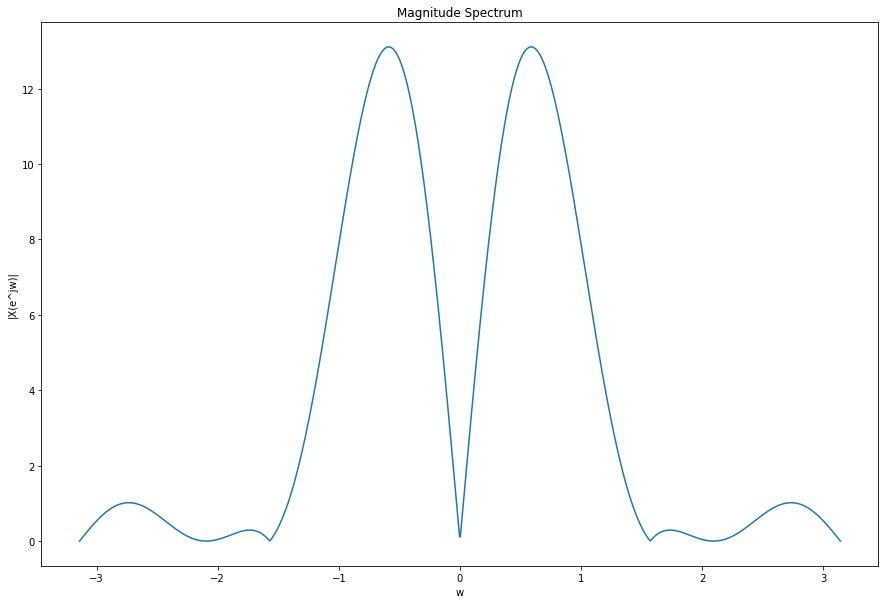

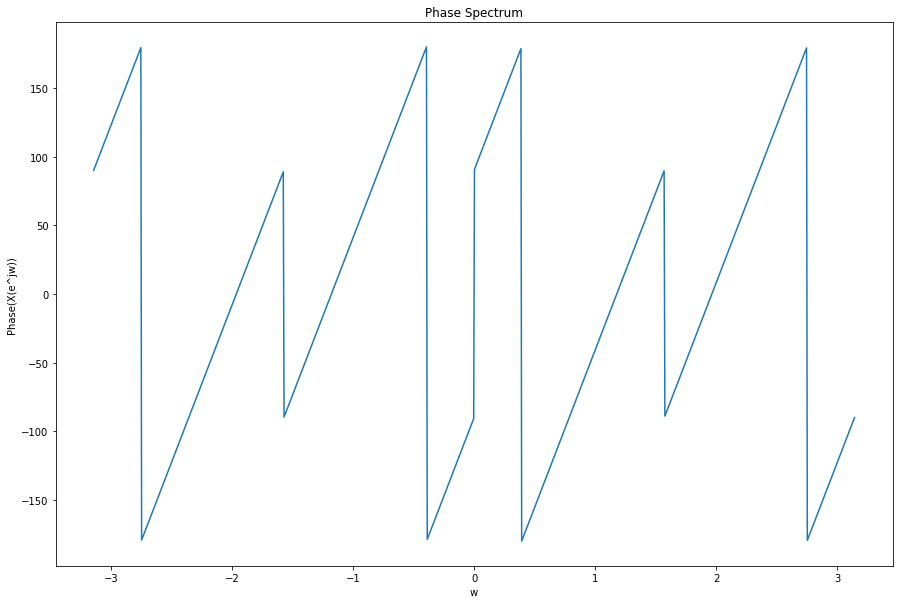

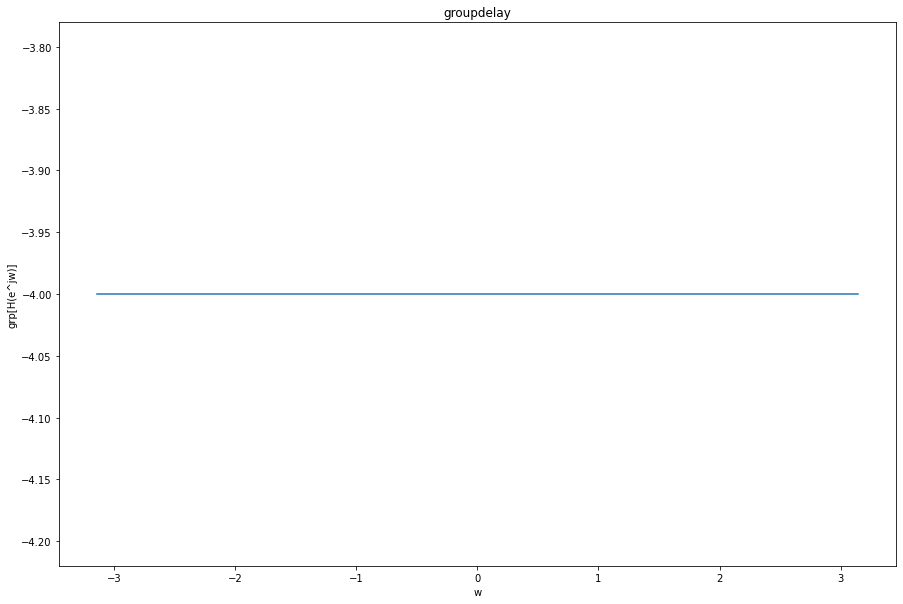

In [7]:
B1,B2,B3=DTFTnew(ha,w_1)

We can observe that our group delay is constant 

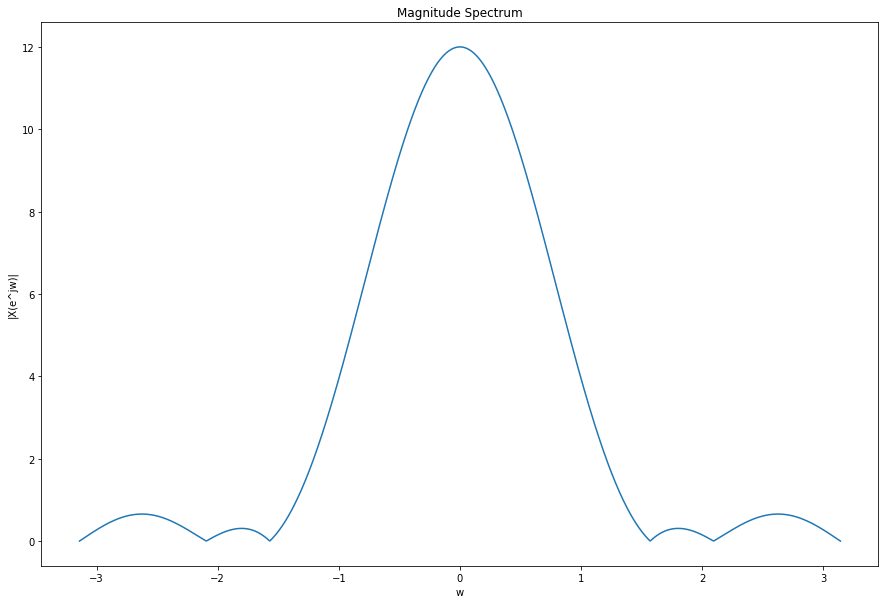

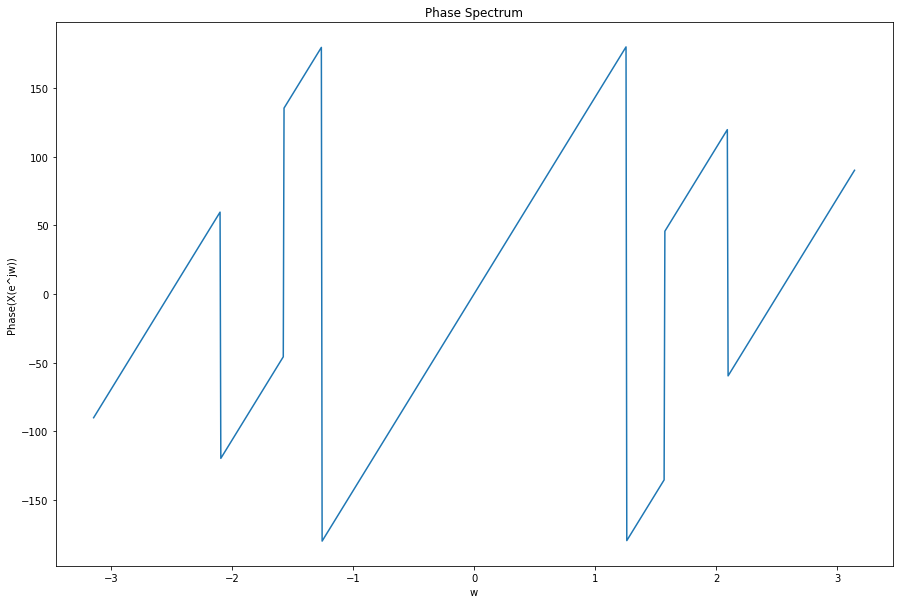

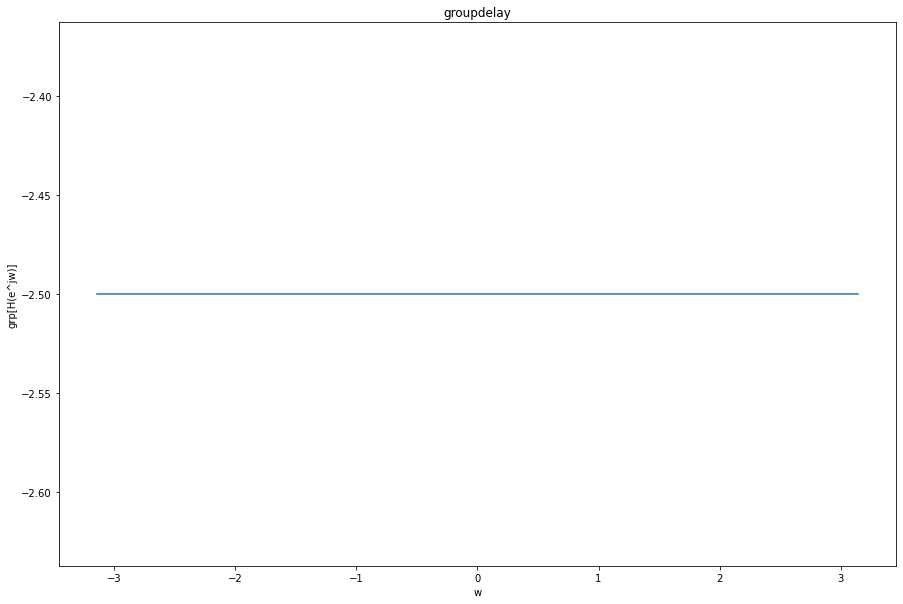

In [14]:
C1,C2,C3=DTFTnew(h2,w_1)

We can observe that our group delay is constant and equal to M/2

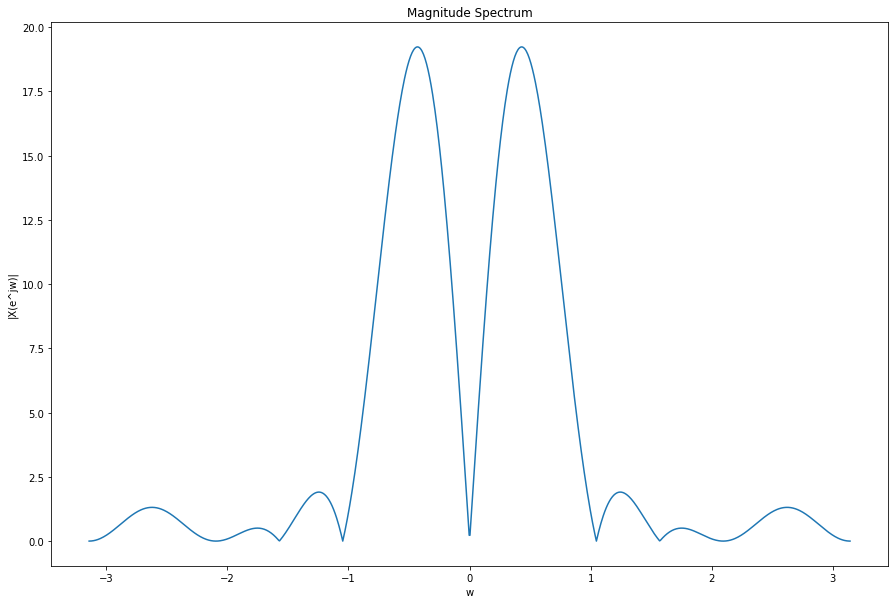

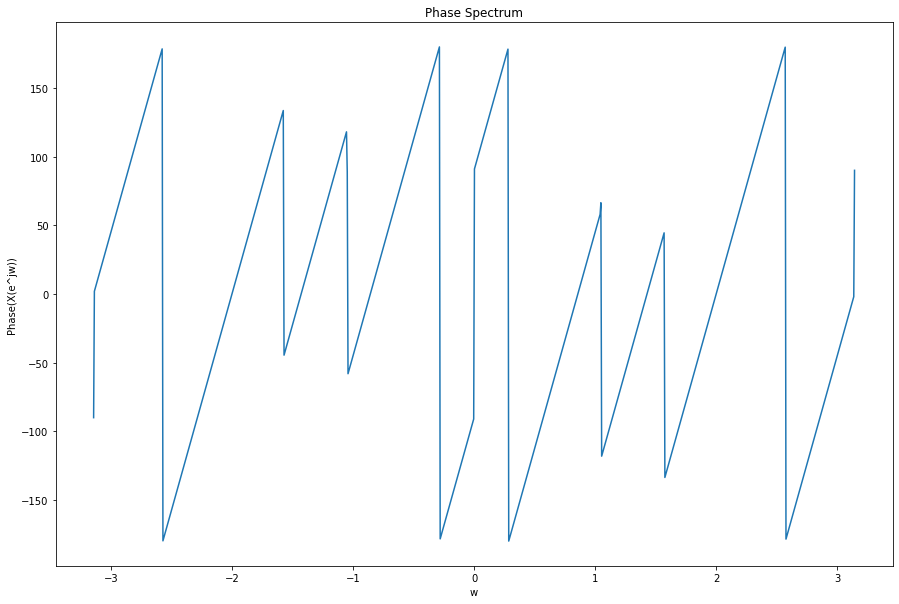

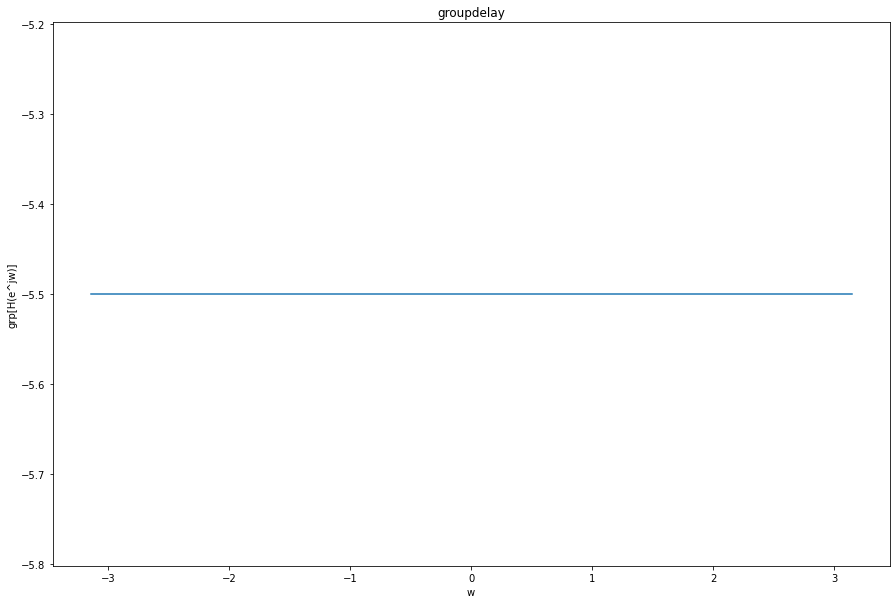

In [15]:
D1,D2,D3=DTFTnew(hb,w_1)

We can observe that our group delay is constant and equal to M/2

### 2-d
#### Part 1
<font size="3"> For derivation of type 3 from type 1 <br><br>
$h_3[n]$ =$h_1[n]$ * ($\delta[n-4]-\delta[n]$) <br> <br>
$H_3(e^{jw})$=$H_1(e^{jw})$($e^{-jw4}$-1) <br> <br>
$|H_3(e^{jw})|$=$|H_1(e^{jw})|$|2sin(2w)|   <br> <br>
 we can observe that from the graph the magnitude of $|H_1(e^{jw})|$ is nullified in $|H_3(e^{jw})|$ at w=0 because of the sine contribution at w=0 and also that $|H_3(e^{jw})|$  now has two peaks on both side of y-axis <br><br>
 Arg$[H_3(e^{jw})]$=Arg[$H_1(e^{jw})$] + 2w + $\pi/2$ +K <br><br>
 Whose effect can be seen in group delay of  $H_3(e^{jw})$ . <font>

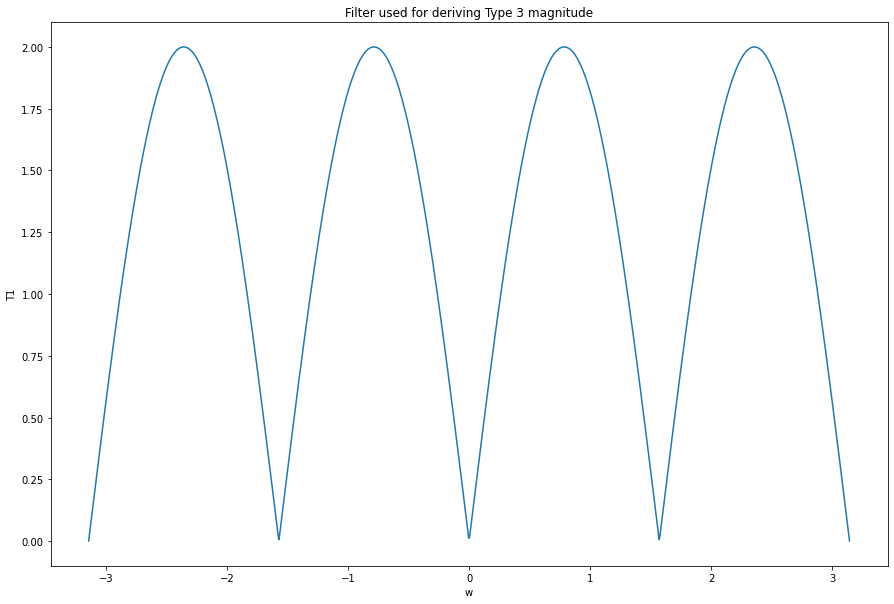

In [16]:
T1=np.zeros(len(A2))
for i in range(len(A2)):
    T1[i]=B2[i]/A2[i]
f4=plt.figure(4,figsize=(15, 10))
plt.plot(w_1,T1)
plt.xlabel('w')
plt.ylabel('T1')
plt.title('Filter used for deriving Type 3 magnitude')
plt.show()   

#### Part 2
<font size="3"> For derivation of type 4 from type 2 <br><br>
$h_4[n]$ =$h_2[n]$ * ($\delta[n-6]-\delta[n]$) <br> <br>
$H_4(e^{jw})$=$H_2(e^{jw})$($e^{-jw6}$-1) <br> <br>
$|H_4(e^{jw})|$=$|H_2(e^{jw})|$|2sin(3w)|   <br> <br>
 we can observe that from the graph the magnitude of $|H_2(e^{jw})|$ is nullified in $|H_4(e^{jw})|$ at w=0 because of the sine contribution at w=0 and also that $|H_4(e^{jw})|$  now has two peaks on both side of y-axis <br><br>
 Arg$[H_4(e^{jw})]$=Arg[$H_2(e^{jw})$] + 3w + $\pi/2$ + K  <br><br>
 Whose effect can be seen in group delay of  $H_4(e^{jw})$ . <font>

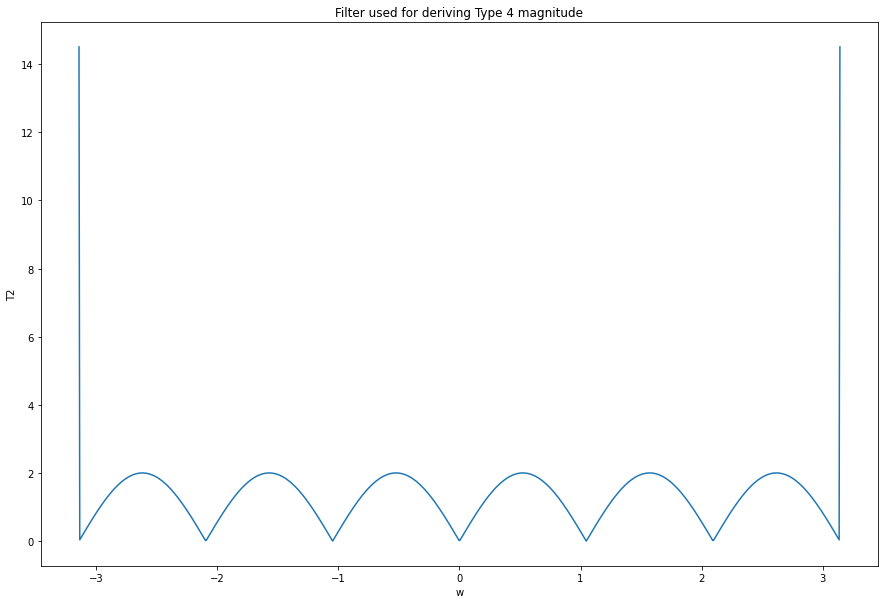

In [18]:
T2=np.zeros(len(C2))
for i in range(len(C2)):
    T2[i]=D2[i]/C2[i]
f4=plt.figure(4,figsize=(15, 10))
plt.plot(w_1,T2)
plt.xlabel('w')
plt.ylabel('T2')
plt.title('Filter used for deriving Type 4 magnitude')
plt.show()  